Постройте три модели  для прогнозирования цены квартир:
 
1.на основе количества метров;\
2.на основе расстояния до метро;\
3.на основе квадратных метров & расстояния до метро;

Далее:\
1.Для 1 и 2-го случая отобразите на графике исходные и прогнозные значения.\
2.Сравните исходные и прогнозные значения с помощью метрик качества (всех упомянутых в презентации 12 метрик для всех моделей).


In [142]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [143]:
import os
os.chdir("/Users/egorgusev/Анализ данных/data_mining_spbu/HW8")

In [144]:
df = pd.read_csv('FLATS.csv', sep=';', encoding='Windows-1251')

In [145]:
df.head()

,Id,SQUARE_METERS,METRO_DISTANCE,PRICE
0,601,28,677,7328400
1,602,54,120,9754600
2,603,43,1344,6781500
3,604,33,1003,6784100
4,605,30,591,7296200


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Id              100 non-null    int64
 1   SQUARE_METERS   100 non-null    int64
 2   METRO_DISTANCE  100 non-null    int64
 3   PRICE           100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [147]:
df.isna().sum()

Id                0
SQUARE_METERS     0
METRO_DISTANCE    0
PRICE             0
dtype: int64

In [148]:
from sklearn import linear_model

### Метрики качества

In [178]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [179]:
def MPE(y_real: np.ndarray, y_pred: np.ndarray):
    res = 0
    for (real, pred) in zip(y_real, y_pred):
        res += (pred - real)/real
    res /= len(y_real)
    res *= 100
    return res

In [180]:
def MAPE(y_real, y_pred): 
    y_true, y_pred = np.array(y_real), np.array(y_pred)
    return np.mean(np.abs(y_real - y_pred)/ y_real) * 100

In [202]:
def AD(y_real, y_pred):
    res = 0
    for pred in y_pred:
        res += np.abs(pred - y_real.mean())
    return res

In [203]:
def MAD(y_real, y_pred):
    return (AD(y_real, y_pred)/len(y_real))

In [204]:
def Theil(y_real: np.ndarray, y_pred: np.ndarray):
    res, sum1, sum_pred, sum_real = 0, 0, 0, 0
    for (real, pred) in zip(y, y_pred):
        sum1 += (pred - real)**2
        sum_pred += pred**2
        sum_real += real**2
    res = np.sqrt(sum1/(sum_pred + sum_real))
    return res

In [205]:
def PrintMetrics(y, y_pred):
    print ('The mean absolute error: {0}'.format(mean_absolute_error(y, y_pred)))
    print ('The root mean squared error: {0}'.format(np.sqrt(mean_squared_error(y, y_pred))))
    print ('The mean percentage error: {0}'.format(MPE(y, y_pred)))
    print ('The mean absolute percentage error: {0}'.format(MAPE(y, y_pred)))
    print ('Absolute deviation: {0}'.format(AD(y, y_pred)))
    print ('The mean absolute deviation: {0}'.format(MAD(y, y_pred)))
    print ('Theil: {0}'.format(Theil(y, y_pred)))

### 1.на основе количества метров

In [206]:
SQUARE_METERS = df['SQUARE_METERS']
y = df['PRICE']

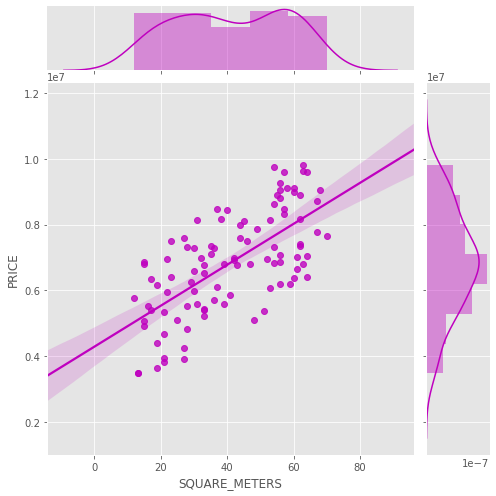

In [207]:
g = sns.jointplot(x='SQUARE_METERS', y='PRICE', data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [208]:
reg1 = linear_model.LinearRegression()
SQUARE_METERS = SQUARE_METERS.values.reshape(-1,1)
reg1.fit(SQUARE_METERS, y)

LinearRegression()

In [209]:
coef = pd.DataFrame(zip(['intercept'] + df.drop(['PRICE', 'Id'] , axis=1).columns.tolist(), [reg1.intercept_] + reg1.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,4.292936e+06
1,SQUARE_METERS,6.214873e+04


In [210]:
PrintMetrics(y, reg1.predict(SQUARE_METERS))

The mean absolute error: 990261.9424950252
The root mean squared error: 1141985.1272904896
The mean percentage error: 3.3011403791209175
The mean absolute percentage error: 15.69379263454044
Absolute deviation: 91939101.20964508
The mean absolute deviation: 919391.0120964508
Theil: 0.11574465364713012


In [211]:
print ('R^2: {0}'.format(reg1.score(SQUARE_METERS, y)))

R^2: 0.45222058564965084


### 2.на основе расстояния до метро

In [212]:
METRO_DISTANCE = df['METRO_DISTANCE']

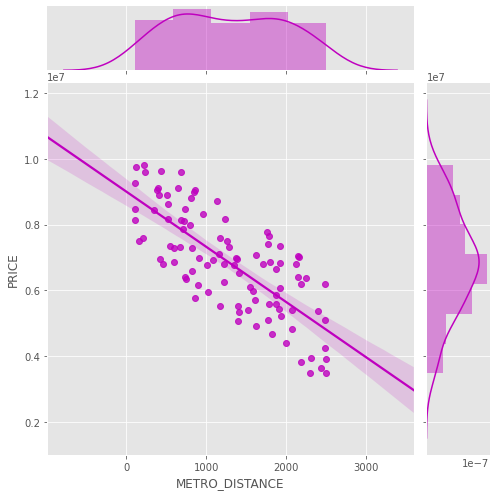

In [213]:
g = sns.jointplot(x='METRO_DISTANCE', y='PRICE', data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [214]:
reg2 = linear_model.LinearRegression()
METRO_DISTANCE = METRO_DISTANCE.values.reshape(-1,1)
reg2.fit(METRO_DISTANCE, y)

LinearRegression()

In [215]:
coef = pd.DataFrame(zip(['intercept'] + df.drop(['PRICE', 'Id'] , axis=1).columns.tolist(), [reg2.intercept_] + reg2.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,9.003176e+06
1,SQUARE_METERS,-1.679031e+03


In [216]:
PrintMetrics(y, reg2.predict(METRO_DISTANCE))

The mean absolute error: 870605.1584099769
The root mean squared error: 1002814.0345235703
The mean percentage error: 2.569573659947029
The mean absolute percentage error: 13.780389955268438
Absolute deviation: 101989176.67189084
The mean absolute deviation: 1019891.7667189084
Theil: 0.10148364845817766


In [217]:
print ('R^2: {0}'.format(reg2.score(METRO_DISTANCE, y)))

R^2: 0.5775983380546676


### 3. на основе квадратных метров & расстояния до метро

In [218]:
x = df.drop(['PRICE', 'Id'] , axis=1)

In [219]:
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [220]:
y_pred = model.predict(x)

In [221]:
coef = pd.DataFrame(zip(['intercept'] + x.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,6.496840e+06
1,SQUARE_METERS,5.852554e+04
2,METRO_DISTANCE,-1.603460e+03


In [222]:
PrintMetrics(y, y_pred)

The mean absolute error: 188069.83565566633
The root mean squared error: 231660.84415639355
The mean percentage error: 0.1306106690593657
The mean absolute percentage error: 2.845915952227681
Absolute deviation: 121653918.61100905
The mean absolute deviation: 1216539.1861100905
Theil: 0.02333036423632188
